# 词云示例

词云是很有说服力的一种可视化方式，尤其是对于文本中心内容展示，我在这章需要学习的就是根据几个小例子，学会词云的使用方法。  
（1）直接形成词云  
（2）导入自己定义的背景图形成词云  
通过本章学习，我熟悉词云的过程为如下几个步骤：  
（1）导包  
（2）导数据，分词（去停用词，统计词频）  
（3）做词云

## 1.引入相关的包

In [4]:
#coding:utf-8
__author__ = 'Hanxiaoyang'

import warnings
warnings.filterwarnings("ignore")
import jieba    # 分词包
import numpy    # numpy计算包
import codecs   # codecs提供的open方法来指定打开的文件的语言编码，它会在读取的时候自动转换为内部unicode 
import pandas as pd  
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)
from wordcloud import WordCloud  # 词云包

## 2.导入娱乐新闻数据，分词：

In [5]:
df = pd.read_csv("./data/entertainment_news.csv", encoding='utf-8')  # 读取csv文件内容
df = df.dropna()  # 删除缺失数据
content=df.content.values.tolist()  # 文本内容转化为list形式
#jieba.load_userdict(u"data/user_dic.txt")
segment=[]
for line in content:
    try:
        segs=jieba.lcut(line)  # 分词
        for seg in segs:
            if len(seg)>1 and seg!='\r\n':  # 如果文档该行内容不为空且不是换行符，添加
                segment.append(seg)
    except:
        print(line)
        continue

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/1q/57zhs1tx0230_c9b_0hc055m0000gn/T/jieba.cache
Loading model cost 0.794 seconds.
Prefix dict has been built succesfully.


### a.去停用词

In [6]:
words_df=pd.DataFrame({'segment':segment})  # 将数据转化为dataframe表格格式
#words_df.head()
stopwords=pd.read_csv("data/stopwords.txt",index_col=False,quoting=3,sep="\t",names=['stopword'], encoding='utf-8')  # 读取停用词，quoting=3全不引用
#stopwords.head()
words_df=words_df[~words_df.segment.isin(stopwords.stopword)]  # words_df中存储的是非停用词的词汇

### b.统计词频

In [8]:
words_stat=words_df.groupby(by=['segment'])['segment'].agg({"计数":numpy.size})
words_stat=words_stat.reset_index().sort_values(by=["计数"],ascending=False)
words_stat.head()

,segment,计数
60811,电影,10230
73265,观众,5574
8615,中国,5476
70481,节目,4398
33623,导演,4197


## 3.做词云

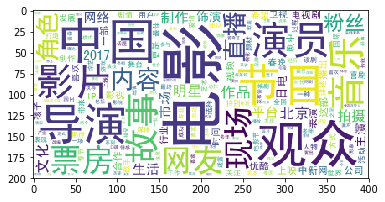

In [9]:
wordcloud=WordCloud(font_path="data/simhei.ttf",background_color="white",max_font_size=80)
word_frequence = {x[0]:x[1] for x in words_stat.head(1000).values}
wordcloud=wordcloud.fit_words(word_frequence)
plt.imshow(wordcloud)

### 用自定义背景图做词云

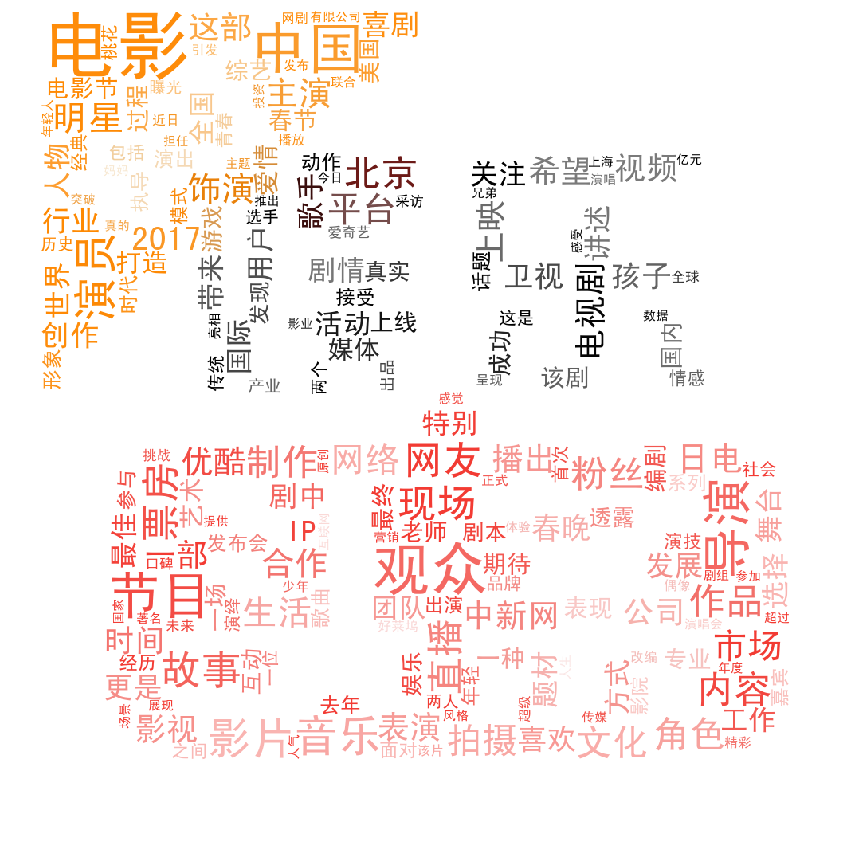

In [11]:
from scipy.misc import imread
matplotlib.rcParams['figure.figsize'] = (15.0, 15.0)
from wordcloud import WordCloud,ImageColorGenerator
bimg=imread('image/entertainment.jpeg')
wordcloud=WordCloud(background_color="white",mask=bimg,font_path='data/simhei.ttf',max_font_size=200)
word_frequence = {x[0]:x[1] for x in words_stat.head(1000).values}
wordcloud=wordcloud.fit_words(word_frequence)
bimgColors=ImageColorGenerator(bimg)
plt.axis("off")
plt.imshow(wordcloud.recolor(color_func=bimgColors))

### 体育新闻

In [13]:
df = pd.read_csv("./data/sports_news.csv", encoding='utf-8')
df = df.dropna()
content=df.content.values.tolist()
#jieba.load_userdict(u"data/user_dic.txt")
segment=[]
for line in content:
    try:
        segs=jieba.lcut(line)
        for seg in segs:
            if len(seg)>1 and seg!='\r\n':
                segment.append(seg)
    except:
        print(line)
        continue

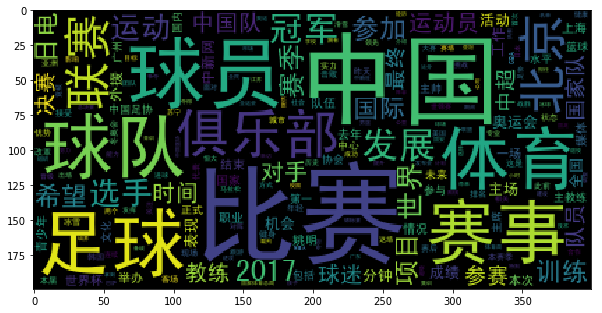

In [14]:
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
words_df=pd.DataFrame({'segment':segment})
#words_df.head()
stopwords=pd.read_csv("data/stopwords.txt",index_col=False,quoting=3,sep="\t",names=['stopword'], encoding='utf-8')#quoting=3全不引用
#stopwords.head()
words_df=words_df[~words_df.segment.isin(stopwords.stopword)]
words_stat=words_df.groupby(by=['segment'])['segment'].agg({"计数":numpy.size})
words_stat=words_stat.reset_index().sort_values(by=["计数"],ascending=False)
words_stat.head()
wordcloud=WordCloud(font_path="data/simhei.ttf",background_color="black",max_font_size=80)
word_frequence = {x[0]:x[1] for x in words_stat.head(1000).values}
wordcloud=wordcloud.fit_words(word_frequence)
plt.imshow(wordcloud)

#### 加入自定义的图

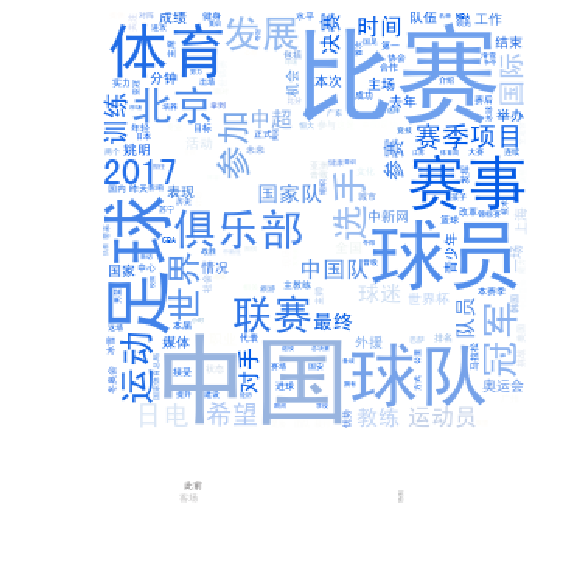

In [16]:
from scipy.misc import imread
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)  # 定义词云图像大小
from wordcloud import WordCloud,ImageColorGenerator
bimg=imread('image/sports.jpeg')  # 读取背景图
wordcloud=WordCloud(background_color="white",mask=bimg,font_path='data/simhei.ttf',max_font_size=200)
word_frequence = {x[0]:x[1] for x in words_stat.head(1000).values}  # 选取前1000个高频词
wordcloud=wordcloud.fit_words(word_frequence)  # 训练词云
bimgColors=ImageColorGenerator(bimg)  # 颜色根据背景图进行调整
plt.axis("off")
plt.imshow(wordcloud.recolor(color_func=bimgColors))